## Inverse Dynamics of a Planar Two-Link RP Robot Arm

In [3]:
from sympy import *
from sympy.physics.mechanics import LagrangesMethod, dynamicsymbols
import numpy as np
from IPython.display import display, Markdown, Math
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def dispmath(lhs, rhs): display(Math(f'{lhs} = {latex(rhs)}'))

In [5]:
m1, m2, l1, l2, g, t = symbols('m1, m2, l1, l2, g, t')
th1, th2 = dynamicsymbols('theta1, theta2')

In [6]:
x1 = l1*cos(th1); dispmath('x_1', x1)
y1 = l1*sin(th1); dispmath('y_1', y1)
x2 = x1 + l2*cos(th2); dispmath('x_2', x2)
y2 = y1 + l2*sin(th2); dispmath('y_2', y2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
x1d = x1.diff(t); dispmath('\\dot{x_1}', x1d)
y1d = y1.diff(t); dispmath('\\dot{y_1}', y1d)
x2d = x2.diff(t); dispmath('\\dot{x_2}', x2d)
y2d = y2.diff(t); dispmath('\\dot{y_2}', y2d)
v1 = (x1d**2 + y1d**2)**(1/2); dispmath('\\dot{v_1}', v1)
v2 = (x2d**2 + y2d**2)**(1/2); dispmath('\\dot{v_2}', v2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Introducing shorthands for derivatives:

In [45]:
thd1 = Derivative(th1, t)
thdd1 = Derivative(thd1, t)
thd2 = Derivative(th2, t)
thdd2 = Derivative(thd2, t)

Computing the kinetic and potential energies:

In [11]:
KE1 = simplify((m1*(x1d**2 + y1d**2)/2))
KE2 = simplify((m2*(x2d**2 + y2d**2)/2))
KE = KE1+KE2 

PE1 = m1*g*y1
PE2 = m2*g*y2
PE = PE1 + PE2

dispmath('KE', KE)
dispmath('PE', PE)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
L = simplify(KE - PE)
dispmath('L', L)

<IPython.core.display.Math object>

In [14]:
LM = LagrangesMethod(L, (th1, th2))
eqns = LM.form_lagranges_equations()
dispmath('\\begin{bmatrix} T \\\\ F \\end{bmatrix}', eqns)

<IPython.core.display.Math object>

In [ ]:
def g1_g2(t, th1, th2, dth1, dth2):
    m1 = 1
    m2 = 1
    l1 = 1
    l2 = 1
    T1 = 0
    T2 = 0
    g = 9.981
    Mdel = m2/(m1+m2)
    
    A = (Mdel*T1)/(m2*l1) - (Mdel*l2*dth2**2)*np.sin(th1-th2) - g*np.cos(th1) - Mdel*cos(th1-th2)*((T2/(m2*l2)) + l1*dth1**2*np.sin(th1-th2) - g*cos(th2))
    B = l1*(1 - Mdel*np.cos(th1-th2)**2)
    g1 = A/B
    
    C = (T2)/(m2*l2) + (l1*dth1**2)*np.sin(th1-th2) - g*np.cos(th2) - cos(th1-th2)*((T1/(m2*l1)) - Mdel*l2*dth2**2*np.sin(th1-th2) - g*cos(th1))
    D = l2*(1 - Mdel*np.cos(th1-th2)**2)
    g2 = C/D
    return g1, g2

In [16]:
def g1(t, u1, u2, u3, u4):
    m1 = 1
    m2 = 1
    l1 = 1
    l2 = 1
    T1 = 0
    T2 = 0
    g = 9.981
    Mdel = m2/(m1+m2)
    
    th1 = u1, th2 = u2
    dth1 = u3, dth2 = u4
    
    A = (Mdel*T1)/(m2*l1) - (Mdel*l2*dth2**2)*np.sin(th1-th2) - g*np.cos(th1) - Mdel*cos(th1-th2)*((T2/(m2*l2)) + l1*dth1**2*np.sin(th1-th2) - g*cos(th2))
    B = l1*(1 - Mdel*np.cos(th1-th2)**2)
    g1 = A/B

    return g1

def g2(t, u1, u2, u3, u4):
    m1 = 1
    m2 = 1
    l1 = 1
    l2 = 1
    T1 = 0
    T2 = 0
    g = 9.981
    Mdel = m2/(m1+m2)
    
    th1 = u1, th2 = u2
    dth1 = u3, dth2 = u4
    
    C = (T2)/(m2*l2) + (l1*dth1**2)*np.sin(th1-th2) - g*np.cos(th2) - cos(th1-th2)*((T1/(m2*l1)) - Mdel*l2*dth2**2*np.sin(th1-th2) - g*cos(th1))
    D = l2*(1 - Mdel*np.cos(th1-th2)**2)
    g2 = C/D
    return g1, g2

u1_0 = 0
u2_0 = 0
u3_0 = 0
u4_0 = 0

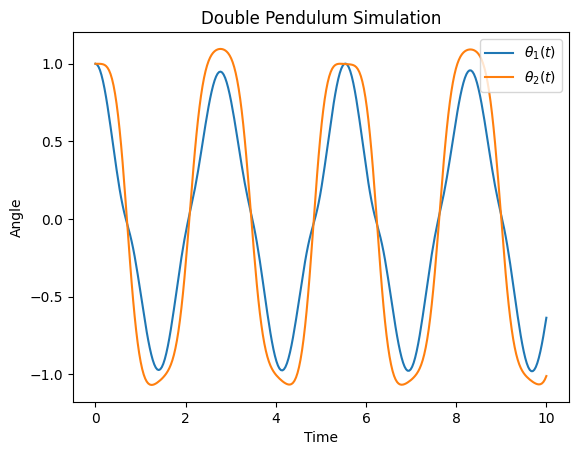

In [30]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE system
def odes(t, x):
    m1, m2, l1, l2, g = 1, 1, 1, 1, 9.81
    Mdel = m2 / (m1 + m2)

    th1, th2, dth1, dth2 = x

    A = -g * (2 * m1 + m2) * np.sin(th1) - m2 * g * np.sin(th1 - 2 * th2) - 2 * np.sin(th1 - th2) * m2 * (dth2**2 * l2 + dth1**2 * l1 * np.cos(th1 - th2))
    B = l1 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
    ddth1 = A / B

    C = 2 * np.sin(th1 - th2) * (dth1**2 * l1 * (m1 + m2) + g * (m1 + m2) * np.cos(th1) + dth2**2 * l2 * m2 * np.cos(th1 - th2))
    D = l2 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
    ddth2 = C / D

    return [dth1, dth2, ddth1, ddth2]

# Initial conditions
x0 = [1, 1, 0, 0]  # th1, th2, dth1, dth2

# Time span
t_span = [0, 10]  # for example, from 0 to 10 seconds

# Solve the system
sol = solve_ivp(odes, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 300))

# Plot the solutions
plt.plot(sol.t, sol.y[0], label=r'$\theta_1(t)$')
plt.plot(sol.t, sol.y[1], label=r'$\theta_2(t)$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Double Pendulum Simulation')
plt.show()

In [44]:
m1 = 1
m2 = 1
l1 = 1
l2 = 1
T1 = 0
T2 = 0
g = 9.981

th1 = 0
th2 = 0
dth1 = 0
dth2 = 0
ddth1 = 1
ddth2 = 2
Theta = np.array([[th1, th2]]).T

ddTheta = np.array([[ddth1], [ddth2]])
dTheta = np.array([[dth1], [dth2]])

M = np.array([[(m1 + m2)*l1**2, m2*l2*l2*np.cos(th1 - th2)],
             [m2*l2*l2*np.cos(th1 - th2), m2*l2**2]])
C = np.array([[m2*l1*l2*dth2**2*np.sin(th1-th2), -m2*l1*l2*th1**2*np.sin(th1-th2)]]).T
G = np.array([[(m1 + m2)*g*l1*np.cos(th1), m2*g*l2*cos(th2)]]).T

F = M @ ddTheta + C + G
F

array([[23.962],
       [12.9810000000000]], dtype=object)

In [40]:
np.array([[ddth1], [ddth2]]).shape, M.shape

((2, 1), (2, 2))

In [ ]:
def control_law(t, th1, th2, dth1, dth2):
    # Placeholder for the actual control law.
    # It should return an array-like structure with the control inputs for each joint, e.g.:
    # return np.array([torque1, torque2])
    return np.array([0, 0])  # This should be replaced with the actual control inputs.

def g1_g2_with_control(t, th1, th2, dth1, dth2):
    m1 = 1
    m2 = 1
    l1 = 1
    l2 = 1
    g = 9.981
    Mdel = m2 / (m1 + m2)
    
    # Get control inputs from the control law
    T = control_law(t, th1, th2, dth1, dth2)
    T1, T2 = T
    
    # Dynamics equations with control torques applied
    A = (Mdel * T1) / (m2 * l1) - (Mdel * l2 * dth2**2) * np.sin(th1 - th2) - g * np.cos(th1) - Mdel * np.cos(th1 - th2) * ((T2 / (m2 * l2)) + l1 * dth1**2 * np.sin(th1 - th2) - g * np.cos(th2))
    B = l1 * (1 - Mdel * np.cos(th1 - th2)**2)
    g1 = A / B
    
    C = (T2) / (m2 * l2) + (l1 * dth1**2) * np.sin(th1 - th2) - g * np.cos(th2) - np.cos(th1 - th2) * ((T1 / (m2 * l1)) - Mdel * l2 * dth2**2 * np.sin(th1 - th2) - g * np.cos(th1))
    D = l2 * (1 - Mdel * np.cos(th1 - th2)**2)
    g2 = C / D
    
    return g1, g2

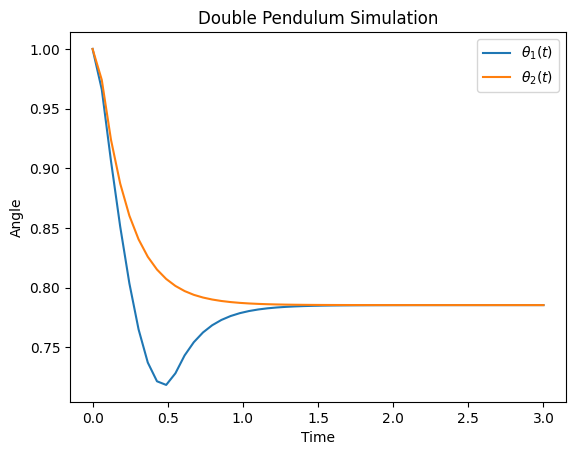

In [59]:
def sliding_mode_control_law(th1, th2, dth1, dth2, lambda_value, K, x_set):
    # Calculate the error and its derivative
    e = np.array([th1, th2]) - x_set
    de = np.array([dth1, dth2])  # Assuming desired velocity is zero
    s = de + lambda_value * e
    
    # Control law
    u = - lambda_value * e - K * np.sign(s)
    return u

# Redefine the odes function to include control
def odes(t, x):
    m1, m2, l1, l2, g = .8, .4, 1, .5, 9.81
    Mdel = m2 / (m1 + m2)

    th1, th2, dth1, dth2 = x
    
    # Set your control parameters and desired state
    lambda_value = np.array([5, 5])  # Example values
    K = np.array([15, 10])  # Example values
    x_set = np.array([np.pi/4, np.pi/4])  # Desired state [th1_set, th2_set]
    
    # Calculate control inputs
    u = sliding_mode_control_law(th1, th2, dth1, dth2, lambda_value, K, x_set)

    # The control inputs u are the torques T1 and T2
    T1, T2 = u

    # Dynamic equations now include the control torques
    A = -g * (2 * m1 + m2) * np.sin(th1) - m2 * g * np.sin(th1 - 2 * th2) - 2 * np.sin(th1 - th2) * m2 * (dth2**2 * l2 + dth1**2 * l1 * np.cos(th1 - th2)) + T1
    B = l1 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
    ddth1 = A / B

    C = 2 * np.sin(th1 - th2) * (dth1**2 * l1 * (m1 + m2) + g * (m1 + m2) * np.cos(th1) + dth2**2 * l2 * m2 * np.cos(th1 - th2)) + T2
    D = l2 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
    ddth2 = C / D

    return [dth1, dth2, ddth1, ddth2]

def event(t, y):
    print(f"Time: {t:.2f}", end="\r")  # Print progress
    return 0  # This event is just for reporting and doesn't terminate the solver.

# Set the event to be terminal or not and the direction
event.terminal = False  # So it does not stop the integration when the event occurs
event.direction = 0     # The event occurs regardless of the direction of the zero crossing

t_span = [0, 3]
# Setup the number of points for t_eval to control the output frequency
t_eval_points = np.linspace(t_span[0], t_span[1], 50)

# Solve the system, including the event
sol = solve_ivp(odes, t_span, x0, method='RK45', t_eval=t_eval_points, events=event)

# Plot the solutions
plt.plot(sol.t, sol.y[0], label=r'$\theta_1(t)$')
plt.plot(sol.t, sol.y[1], label=r'$\theta_2(t)$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Double Pendulum Simulation')
plt.show()

In [57]:
import imageio
def get_arm_positions(th1, th2, l1=1, l2=1):
    # X and Y coordinates of the first segment
    x1 = l1 * np.sin(th1)
    y1 = l1 * np.cos(th1)
    
    # X and Y coordinates of the second segment
    x2 = x1 + l2 * np.sin(th2)
    y2 = y1 + l2 * np.cos(th2)
    
    return (0, 0), (x1, y1), (x2, y2)

# Create frames for each timestep
filenames = []
for i in range(len(sol.t)):
    th1, th2 = sol.y[0, i], sol.y[1, i]
    positions = get_arm_positions(th1, th2)
    
    # Plotting the arm
    plt.figure()
    plt.plot([0, positions[1][0]], [0, positions[1][1]], 'r-') # First arm segment
    plt.plot([positions[1][0], positions[2][0]], [positions[1][1], positions[2][1]], 'b-') # Second arm segment
    plt.scatter(*zip(*positions), s=100) # Joints
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.axis('off') # Turn off the axis
    
    # Save the frame
    filename = f'pics/frame_{i}.png'
    plt.savefig(filename)
    plt.close()
    filenames.append(filename)

# Create a GIF
with imageio.get_writer('robot_arm.gif', mode='I', duration=10/1000) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Output the path to the GIF
gif_path = 'robot_arm.gif'
gif_path

/tmp/ipykernel_19087/4014386996.py:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


'robot_arm.gif'